In [1]:
import pandas as pd

In [3]:
iris_data = pd.read_csv('Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
iris_data = iris_data.drop(columns = ["Id"])
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [15]:
le = LabelEncoder()
iris_data['Species'] = le.fit_transform(iris_data['Species'])
iris_data.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
38,4.4,3.0,1.3,0.2,0
44,5.1,3.8,1.9,0.4,0
42,4.4,3.2,1.3,0.2,0
127,6.1,3.0,4.9,1.8,2
140,6.7,3.1,5.6,2.4,2
45,4.8,3.0,1.4,0.3,0
72,6.3,2.5,4.9,1.5,1
119,6.0,2.2,5.0,1.5,2
87,6.3,2.3,4.4,1.3,1
4,5.0,3.6,1.4,0.2,0


In [16]:
X = iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris_data['Species']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
y_pred = model.predict(X_test)

In [24]:
class_names = le.classes_.astype(str)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}\n")

Model Accuracy: 100.00%



In [26]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names = class_names))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [30]:
sample = [[5.1, 3.5, 1.4, 0.2]]  # SepalLength, SepalWidth, PetalLength, PetalWidth
predicted = model.predict(sample)
predicted_species = le.inverse_transform(predicted)[0]  # [0] gets first element

print(f"Predicted Species: {predicted_species}")

Predicted Species: 0


C:\Users\abdul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [33]:
print(iris_data['Species'].unique())  # Should show text labels before encoding

[0 1 2]


In [35]:
species_map = {
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-virginica'
}
print(f"Predicted Species: {species_map[predicted[0]]}")

Predicted Species: Iris-setosa


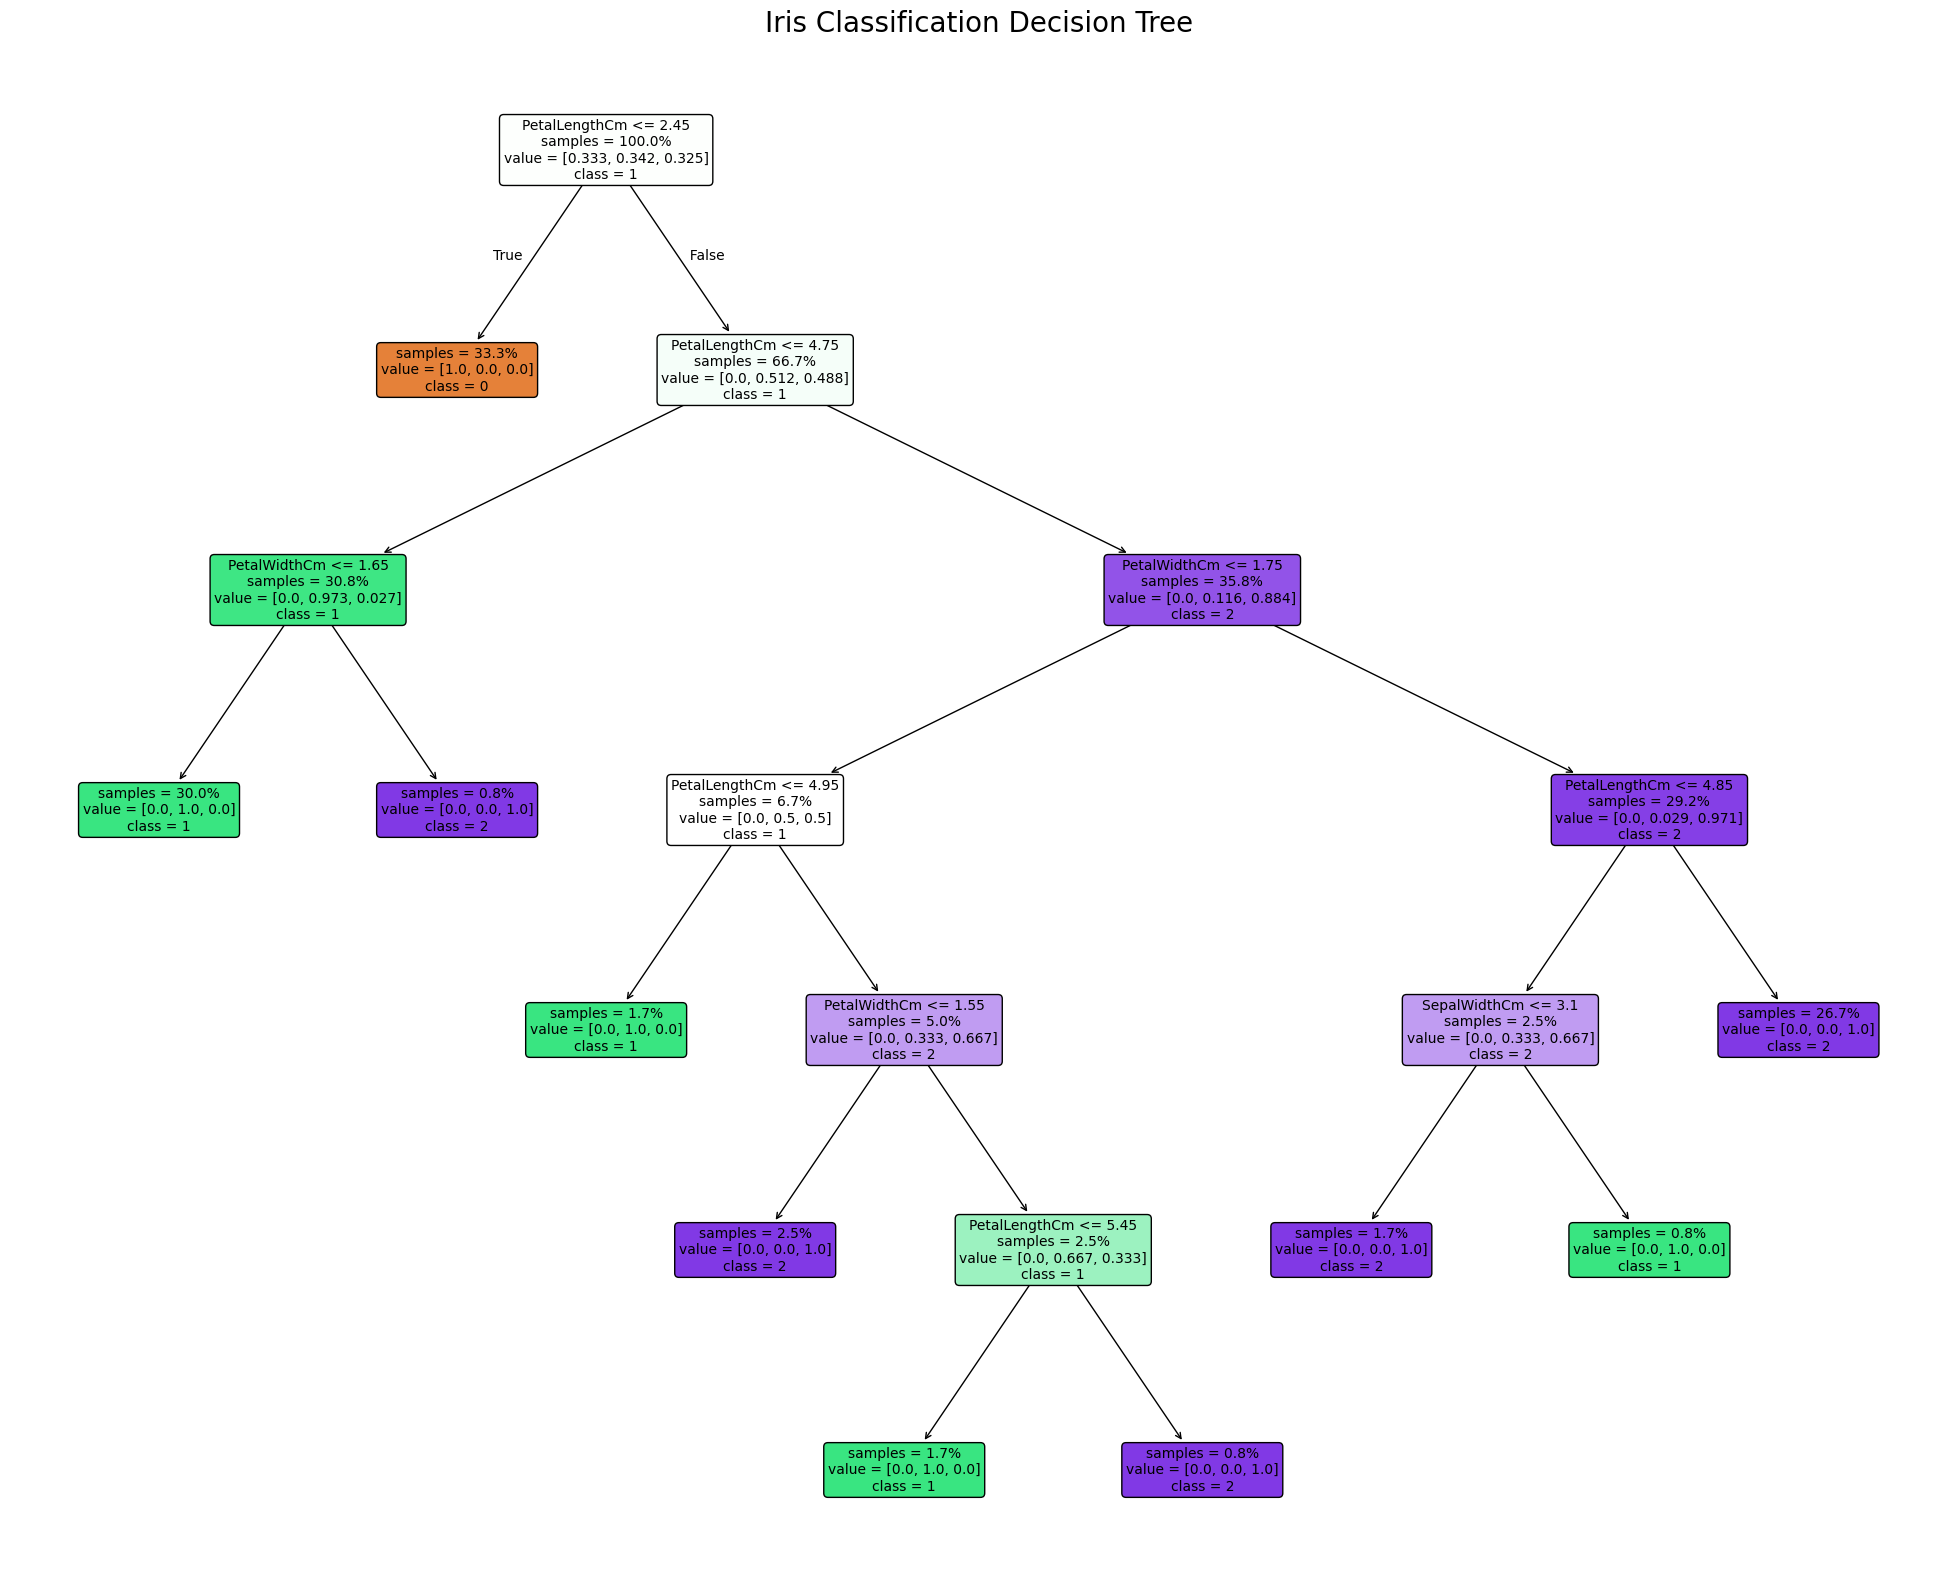

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,20))
plot_tree(model,
          feature_names=X.columns.tolist(),
          class_names=le.classes_.astype(str),
          filled=True,
          impurity=False,
          proportion=True,
          rounded=True,
          fontsize=10)

plt.title("Iris Classification Decision Tree", fontsize=20)
plt.show()